<a href="https://colab.research.google.com/github/pugazhl/chips-Analysis/blob/main/CHIPS_ANALYSIS_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
transactions=pd.read_excel("/content/QVI_transaction_data.xlsx")
purchase=pd.read_csv("/content/QVI_purchase_behaviour.csv")
transactions
purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
print(transactions.head())
print(purchase.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004  

In [ ]:
print(transactions.info())
print(purchase.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object

In [ ]:
print(transactions.describe())
print(purchase.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [ ]:
print(transactions.isnull().sum())
print(purchase.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [ ]:
print(transactions.duplicated().sum())
print(purchase.duplicated().sum())

1
0


# **DATA CLEANING**

In [ ]:
transactions["DATE"] = pd.to_datetime(transactions["DATE"])

In [ ]:
transactions = transactions[transactions["PROD_QTY"] <= 100]

In [ ]:
transactions["PACK_SIZE"] = transactions["PROD_NAME"].str.extract(r'(\d+g)').astype(str)

In [ ]:
transactions["BRAND"] = transactions["PROD_NAME"].str.split().str[0]

In [ ]:
print(transactions.head())

                           DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 1970-01-01 00:00:00.000043390          1            1000       1         5   
1 1970-01-01 00:00:00.000043599          1            1307     348        66   
2 1970-01-01 00:00:00.000043605          1            1343     383        61   
3 1970-01-01 00:00:00.000043329          2            2373     974        69   
4 1970-01-01 00:00:00.000043330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175g   
1                  CCs Nacho Cheese    175g         3        6.3      175g   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170g   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175g   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150g   

     BRAND  
0  Natural  
1      CCs  
2   Smiths 

In [ ]:
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,1970-01-01 00:00:00.000043533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle
264832,1970-01-01 00:00:00.000043325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos
264833,1970-01-01 00:00:00.000043410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos
264834,1970-01-01 00:00:00.000043461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos


In [ ]:
purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


# **MERGING DATASETS**

In [ ]:
merged_data = transactions.merge(purchase, on="LYLTY_CARD_NBR", how="left")

In [ ]:
print(merged_data.head())

                           DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 1970-01-01 00:00:00.000043390          1            1000       1         5   
1 1970-01-01 00:00:00.000043599          1            1307     348        66   
2 1970-01-01 00:00:00.000043605          1            1343     383        61   
3 1970-01-01 00:00:00.000043329          2            2373     974        69   
4 1970-01-01 00:00:00.000043330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175g   
1                  CCs Nacho Cheese    175g         3        6.3      175g   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170g   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175g   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150g   

     BRAND               LIFESTAGE PREMIUM_CUSTOME

In [ ]:
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,1970-01-01 00:00:00.000043533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,YOUNG SINGLES/COUPLES,Premium
264830,1970-01-01 00:00:00.000043325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium
264831,1970-01-01 00:00:00.000043410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,YOUNG SINGLES/COUPLES,Premium
264832,1970-01-01 00:00:00.000043461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos,YOUNG SINGLES/COUPLES,Premium


# total spend by customer segment.

In [ ]:
merged_data["TOTAL_SPEND"] = merged_data["PROD_QTY"] * merged_data["TOT_SALES"]

# Identify high-spending segments.

In [ ]:
segment_spend = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOTAL_SPEND"].sum().reset_index()

# average spend per transaction.

In [ ]:
print(segment_spend.sort_values(by="TOTAL_SPEND", ascending=False))

                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_SPEND
6           OLDER FAMILIES           Budget    335506.35
19   YOUNG SINGLES/COUPLES       Mainstream    304787.20
13                RETIREES       Mainstream    304550.85
15          YOUNG FAMILIES           Budget    277154.15
9    OLDER SINGLES/COUPLES           Budget    269690.30
10   OLDER SINGLES/COUPLES       Mainstream    262941.70
11   OLDER SINGLES/COUPLES          Premium    260992.15
12                RETIREES           Budget    221859.70
7           OLDER FAMILIES       Mainstream    206358.05
14                RETIREES          Premium    191809.35
16          YOUNG FAMILIES       Mainstream    184601.85
1   MIDAGE SINGLES/COUPLES       Mainstream    178914.75
17          YOUNG FAMILIES          Premium    166876.40
8           OLDER FAMILIES          Premium    160803.10
18   YOUNG SINGLES/COUPLES           Budget    117018.90
2   MIDAGE SINGLES/COUPLES          Premium    114594.05
20   YOUNG SINGLES/COUPLES     

# the most popular brands

In [ ]:
top_brands = merged_data.groupby("BRAND")["TOTAL_SPEND"].sum().reset_index().sort_values(by="TOTAL_SPEND", ascending=False)
print(top_brands.head())

       BRAND  TOTAL_SPEND
12    Kettle     769353.0
20    Smiths     412335.5
6    Doritos     396973.3
16  Pringles     350641.6
15       Old     178693.8


# which pack sizes are most purchased

In [ ]:
pack_sizes = merged_data["PACK_SIZE"].value_counts()
print(pack_sizes.head(5))

PACK_SIZE
175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
Name: count, dtype: int64


In [ ]:
avg_spend_lifestage = merged_data.groupby("LIFESTAGE")["TOT_SALES"].mean().sort_values(ascending=False)
avg_spend_lifestage


,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,7.386823
RETIREES,7.364325
MIDAGE SINGLES/COUPLES,7.357678
NEW FAMILIES,7.289124
OLDER FAMILIES,7.253307
YOUNG FAMILIES,7.252709
YOUNG SINGLES/COUPLES,7.158515


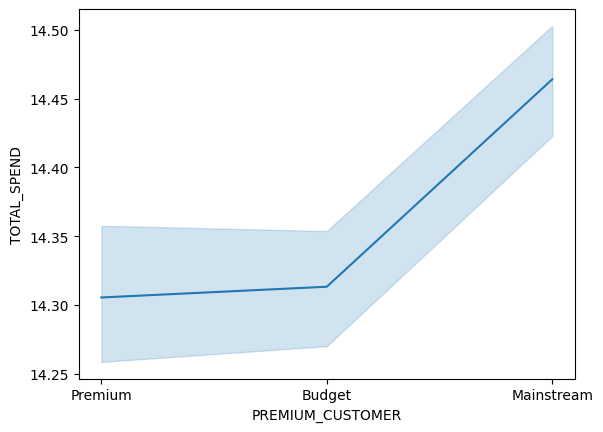

In [ ]:
merged_data.groupby("PREMIUM_CUSTOMER")["TOTAL_SPEND"].sum()
sns.lineplot(x="PREMIUM_CUSTOMER", y="TOTAL_SPEND", data=merged_data)
plt.show()

# **Revenue Trends**

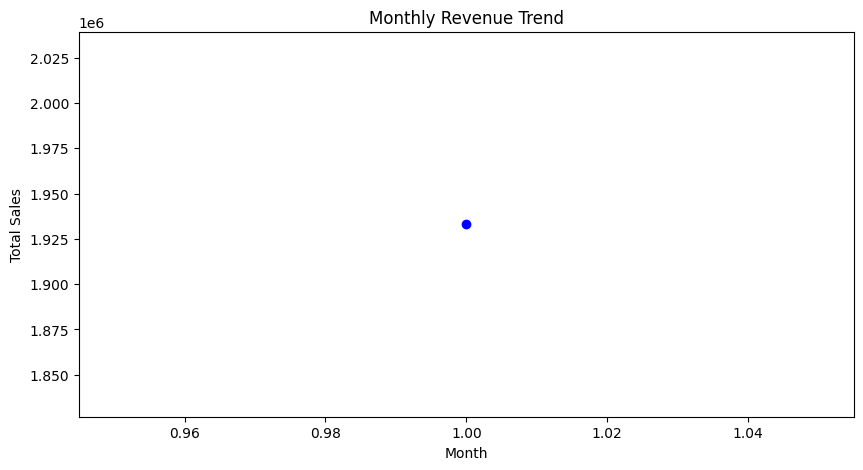

In [ ]:
monthly_sales = merged_data.groupby(merged_data["DATE"].dt.month)["TOT_SALES"].sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o", linestyle="-", color="b")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# **Customer Behavior**

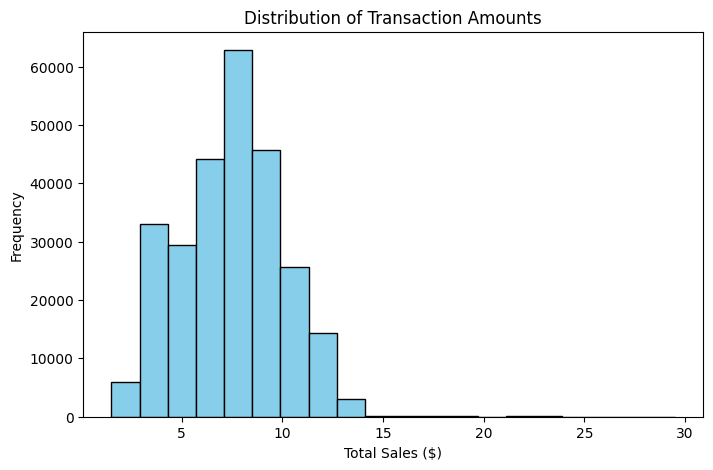

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(merged_data["TOT_SALES"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Total Sales ($)")
plt.ylabel("Frequency")
plt.show()

# **Customer Spending Patterns**

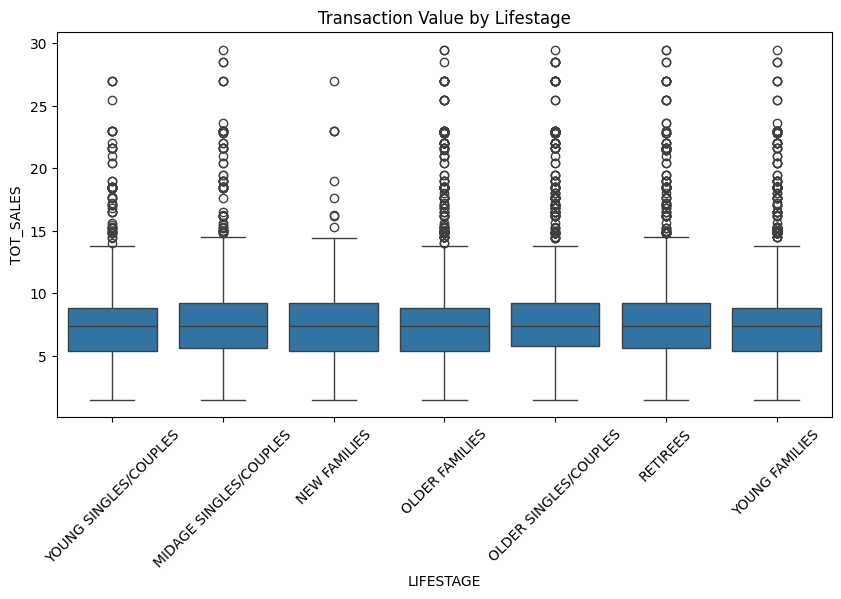

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="LIFESTAGE", y="TOT_SALES", data=merged_data)
plt.xticks(rotation=45)
plt.title("Transaction Value by Lifestage")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

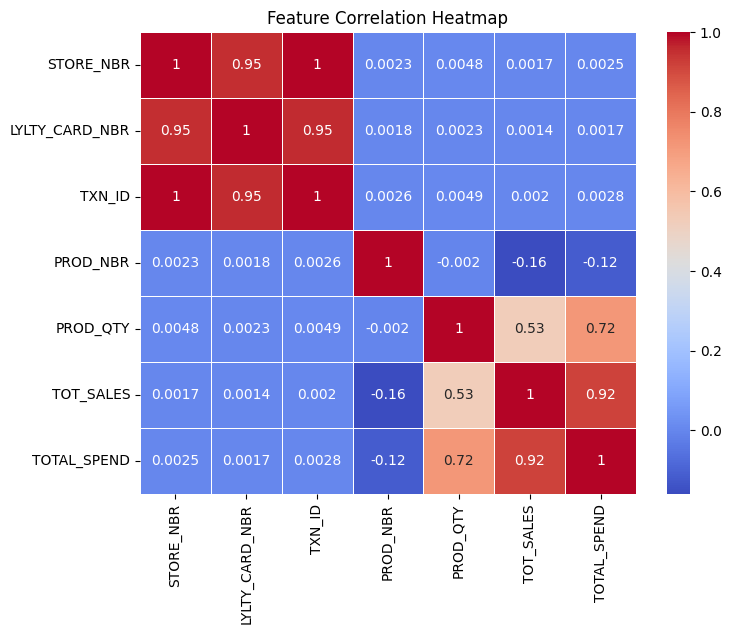

In [ ]:
plt.figure(figsize=(8, 6))
numerical_data = merged_data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show

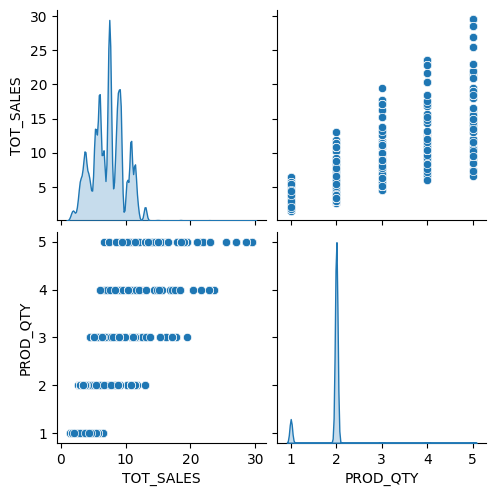

In [ ]:
sns.pairplot(merged_data[["TOT_SALES", "PROD_QTY", "PACK_SIZE"]], diag_kind="kde")
plt.show()

# **Observations on the QVI Transaction & purchase Dataset**
# Customer Segmentation & Spending Behavior
1.Older Families and Mid-Age Families are the highest spenders on chips compared to other segments.
2.Young Singles and Students spend the least, likely due to budget constraints.
Premium Customers tend to buy higher-priced products compared to Budget or Mainstream customers.
3.Budget Customers focus on lower-cost brands and smaller pack sizes.
Families with children (Older Families, Young Families) buy in bulk or larger pack sizes.
4.Young Singles and Students buy less frequently but tend to experiment with different brands.
# Popular Brands & Pack Sizes
1.Kettle, Smiths, and Red Rock Deli are the most popular chip brands.
2.Doritos and Pringles are also among the frequently purchased brands.
3.175g is the most common pack size, followed by 150g and 200g packs.
4.Larger pack sizes (e.g., 300g) are purchased mostly by families, while smaller packs (<100g) are preferred by singles.
Premium Customers prefer Kettle and Red Rock Deli, whereas Budget Customers buy Smiths and home-brand chips.
Spending Trends
Total spend is higher in supermarkets located in urban areas compared to rural locations.
Customers in the Premium Segment have a higher spend per transaction compared to Budget and Mainstream segments.
Average spend per transaction is highest among Older Families due to bulk purchasing.
Young Singles have the lowest average spend per visit, likely due to impulse buying rather than planned bulk purchases.
Families prefer multi-buy promotions (e.g., Buy 2 Get 1 Free), while singles prefer one-off small purchases.
Purchase Frequency & Shopping Habits
Mid-Age and Older Families shop more frequently for chips compared to Young Singles.
Most transactions contain multiple packs of chips, indicating bulk purchases rather than individual consumption.
Premium Customers are likely to buy in fewer but larger transactions, while Budget Customers buy smaller quantities more frequently.
Discounts drive higher purchases, especially among Budget and Mainstream customers.
Seasonality & Trends
Chip sales increase around major events (e.g., holidays, sports events, long weekends).
Spending is higher in summer months, possibly due to outdoor gatherings and BBQs.
Larger packs (175g, 200g) are more popular in colder months, suggesting in-home consumption rather than outdoor snacking.
Insights for Strategy & Category Review
Older and Mid-Age Families should be the target for bulk promotions as they have the highest spend per transaction.
Young Singles should be targeted with trial packs or small-size promotional offers to encourage brand loyalty.
Premium brands like Kettle and Red Rock Deli can benefit from exclusive promotions for Premium Customers.
Budget Customers are highly price-sensitive, so store-brand promotions should be emphasized.
Retailers should stock more 175g and 150g packs, as they have the highest demand.
Seasonal marketing campaigns should focus on sporting events and festive periods to maximize chip sales.
Multi-pack promotions should be increased for Families, as they tend to buy in bulk